<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.
Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.datasets import fetch_california_housing

In [66]:
#Получите данные и загрузите их в рабочую среду
housing = fetch_california_housing()

In [67]:
#Исходные признаки
X=pd.DataFrame(housing.data)
X.rename(columns={0:'MedInc_средний_доход',1:'HouseAge_средний_возраст_дома ',2:'AveRooms_среднее_количество_комнат',3:'AveBedrms_среднее_количество_спален' ,4:'Population_население',5:'AveOccup_среднее_количество_жильцов',6:'Latitude_широта',7:'Longitude_долгота'}, inplace=True)
XXL=X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20640 non-null  float64
 1   HouseAge_средний_возраст_дома        20640 non-null  float64
 2   AveRooms_среднее_количество_комнат   20640 non-null  float64
 3   AveBedrms_среднее_количество_спален  20640 non-null  float64
 4   Population_население                 20640 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20640 non-null  float64
 6   Latitude_широта                      20640 non-null  float64
 7   Longitude_долгота                    20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [68]:
X.head()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,AveOccup_среднее_количество_жильцов,Latitude_широта,Longitude_долгота
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [69]:
#целевая переменная - медианная стоимость дома, в сотнях тыс. дол.
y=pd.DataFrame(housing.target)
y.rename(columns={0:'Price,K$'},inplace=True)
y.head()

,"Price,K$"
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [70]:
#модель 1 на основе всех неизмененных признаков
model1 = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model1.fit(X_train, y_train)

LinearRegression()

In [71]:
#Оценка модели 1(метрики RMSE, R2)
y_pred1 = model1.predict(X_train)
print('На обучающем датасете:')
print(f'R2: {metrics.r2_score(y_train, y_pred1)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred1))}')

y_pred2 = model1.predict(X_test)
r2_model1_test=metrics.r2_score(y_test, y_pred2)
rmse_model1_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))


На обучающем датасете:
R2: 0.6088968118672871
RMSE: 0.7234924745376035


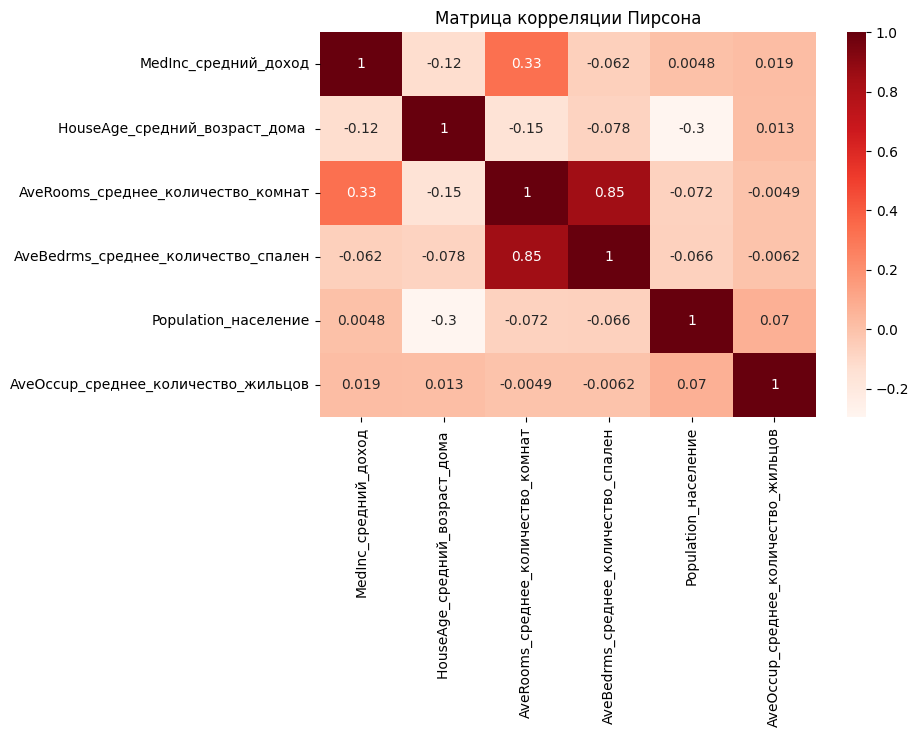

In [72]:
#Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
#Выводы:два столбца AveRooms и AveBedrms с хорошей корреляцией, еще можно увидеть слабую положительную корреляцию между столбцами MedInc и  AveRooms, и слабую отрицательную корреляцию между Population и HouseAge. Удалим оставшийся AveOccup  из признаков.

corr_matrix_pearson = X[['MedInc_средний_доход','HouseAge_средний_возраст_дома ','AveRooms_среднее_количество_комнат','AveBedrms_среднее_количество_спален' ,'Population_население','AveOccup_среднее_количество_жильцов']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

In [73]:
#модель 2 на основе признаков, отобранных по значениям корреляций
X = X.drop(columns=['AveOccup_среднее_количество_жильцов'])

model2 =  LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2.fit(X_train, y_train)


LinearRegression()

In [74]:
#Оценка модели 2 (метрики RMSE, R2)

y_pred3 = model2.predict(X_train)
print('На обучающем датасете:')
print(f'R2: {metrics.r2_score(y_train, y_pred3)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred3))}')

y_pred4 = model2.predict(X_test)
r2_model2_test=metrics.r2_score(y_test, y_pred4)
rmse_model2_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred4))


На обучающем датасете:
R2: 0.6082046143576468
RMSE: 0.7241324313494703


In [75]:
#Исследуйте оставленные признаки на выбросы
X.describe()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,Latitude_широта,Longitude_долгота
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,41.950000,-114.310000


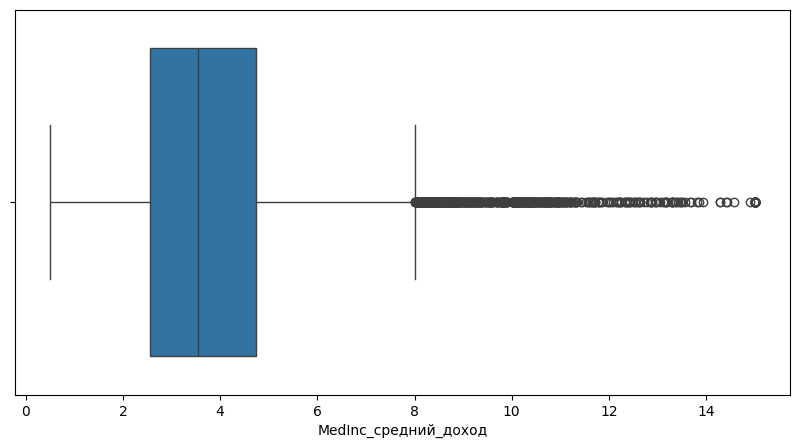

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=X['MedInc_средний_доход'])
plt.show()
#ограничимся 8K$ в месяц


<Axes: ylabel='Frequency'>

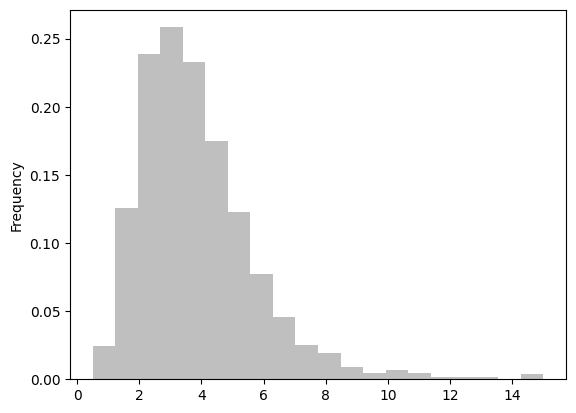

In [77]:
X['MedInc_средний_доход'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey')

In [78]:
#Получаем верхнюю и нижнюю устанавливаемых границ и выводим не входящие в диапазон
lower_bound = X['MedInc_средний_доход'].quantile(q=0.01)
upper_bound = X['MedInc_средний_доход'].quantile(q=0.99)
print(lower_bound,upper_bound)
X['MedInc_средний_доход'][(X['MedInc_средний_доход'] < lower_bound) | (X['MedInc_средний_доход'] > upper_bound)]

1.069631 10.596540000000003


,MedInc_средний_доход
42,1.0250
48,0.9506
50,0.9218
57,0.8172
62,0.9011
...,...
20091,0.4999
20163,12.6320
20436,12.5420
20537,1.0633


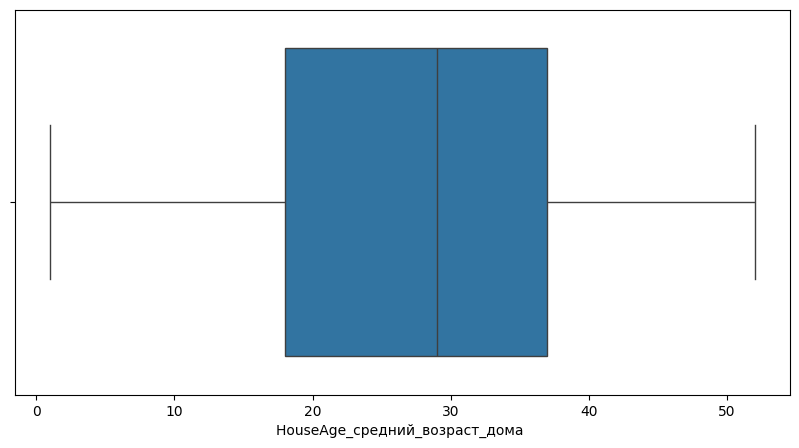

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=X['HouseAge_средний_возраст_дома '])
plt.show()
#нет выбросов

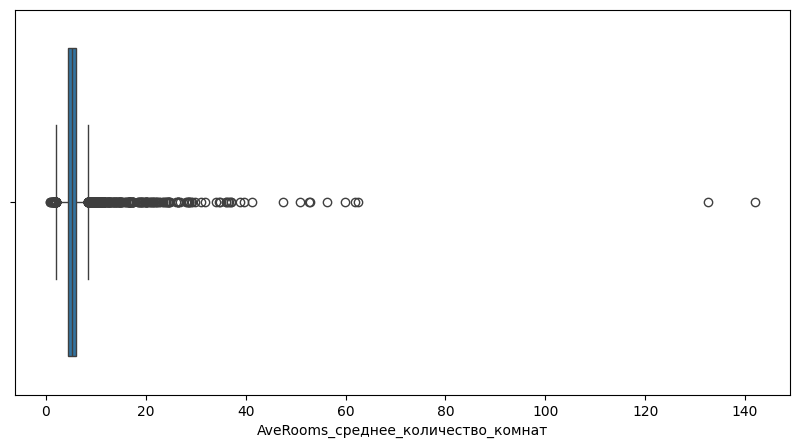

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=X['AveRooms_среднее_количество_комнат'])
plt.show()

In [81]:
#Получаем верхнюю и нижнюю устанавливаемых границ и выводим не входящие в диапазон
lower_bound = X['AveRooms_среднее_количество_комнат'].quantile(q=0.005)
upper_bound = X['AveRooms_среднее_количество_комнат'].quantile(q=0.995)
print(lower_bound,upper_bound)
X['AveRooms_среднее_количество_комнат'][(X['AveRooms_среднее_количество_комнат'] < lower_bound) | (X['AveRooms_среднее_количество_комнат'] > upper_bound)]
#ограничимся 16 комнатами

2.3237973419854 15.754931806259924


,AveRooms_среднее_количество_комнат
50,2.045662
73,1.714286
86,2.315789
95,2.294016
1024,29.852941
...,...
19976,21.095238
19977,18.793522
20093,24.669118
20094,37.063492


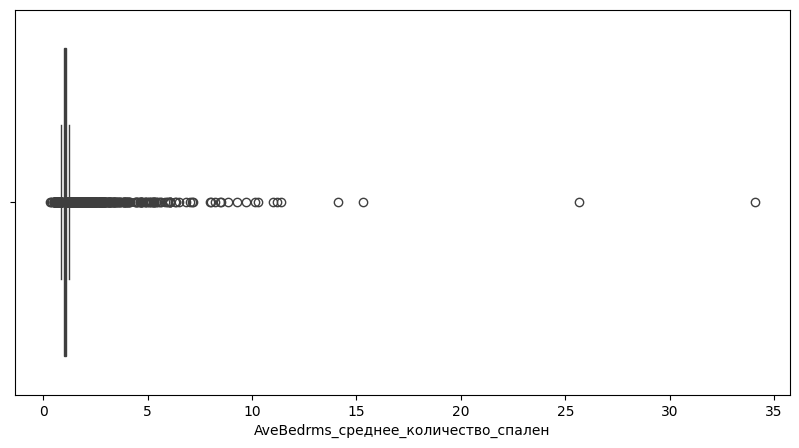

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=X['AveBedrms_среднее_количество_спален'])
plt.show()


In [21]:
#Получаем верхнюю и нижнюю устанавливаемых границ и выводим не входящие в диапазон
lower_bound = X['AveBedrms_среднее_количество_спален'].quantile(q=0.005)
upper_bound = X['AveBedrms_среднее_количество_спален'].quantile(q=0.995)
print(lower_bound,upper_bound)
X['AveBedrms_среднее_количество_спален'][(X['AveBedrms_среднее_количество_спален'] < lower_bound) | (X['AveBedrms_среднее_количество_спален'] > upper_bound)]
#ограничимся 4 спальнями

0.831037411971831 3.112918261538778


,AveBedrms_среднее_количество_спален
59,0.754386
73,0.571429
140,0.730769
192,0.781818
270,0.659574
...,...
20107,0.818182
20113,6.500000
20248,0.333333
20349,0.758621


In [53]:
#Удаляем выбросы
XXL['Target']=y
XXL=XXL[XXL['AveRooms_среднее_количество_комнат']<=16]
XXL=XXL[XXL['AveBedrms_среднее_количество_спален']<=4]
XXL=XXL[XXL['MedInc_средний_доход']<=11]
XXL.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20380 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20380 non-null  float64
 1   HouseAge_средний_возраст_дома        20380 non-null  float64
 2   AveRooms_среднее_количество_комнат   20380 non-null  float64
 3   AveBedrms_среднее_количество_спален  20380 non-null  float64
 4   Population_население                 20380 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20380 non-null  float64
 6   Latitude_широта                      20380 non-null  float64
 7   Longitude_долгота                    20380 non-null  float64
 8   Target                               20380 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


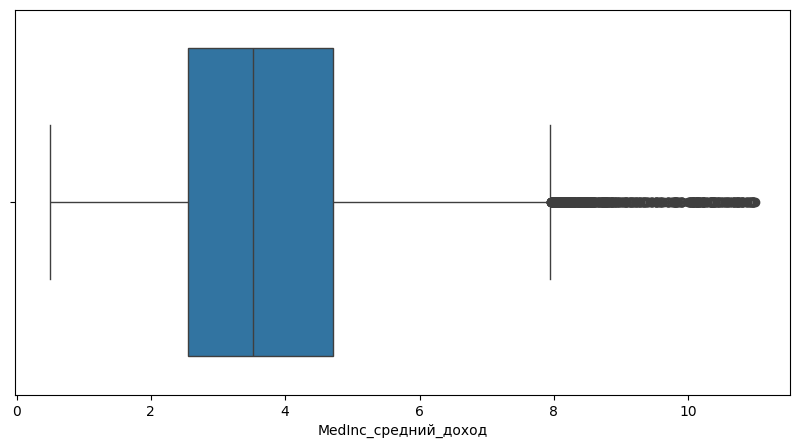

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=XXL['MedInc_средний_доход'])
plt.show()

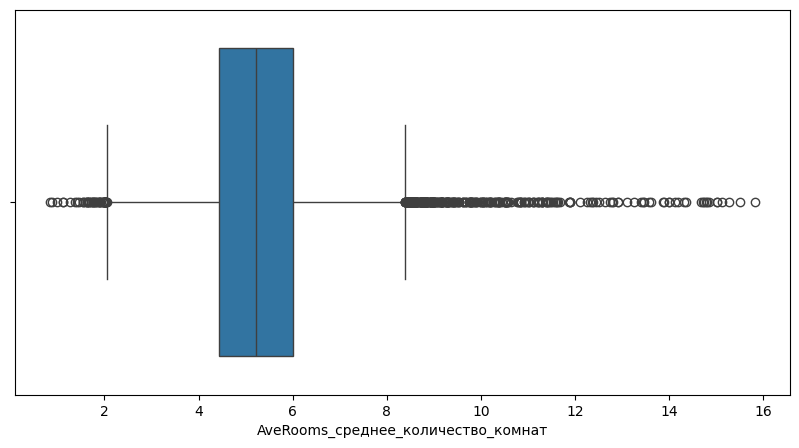

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=XXL['AveRooms_среднее_количество_комнат'])
plt.show()

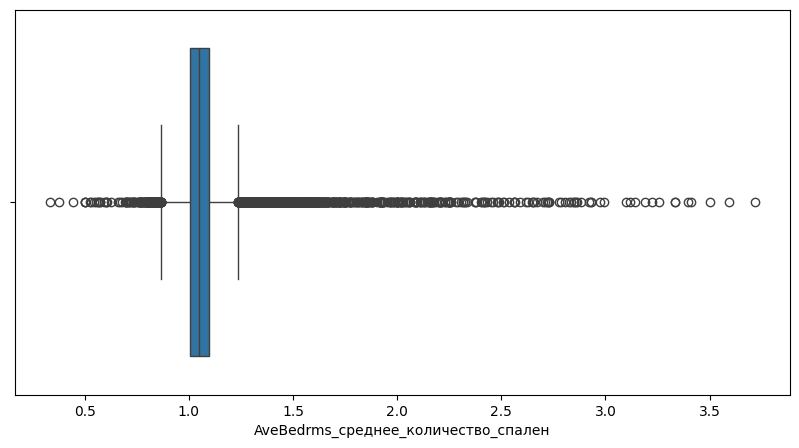

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=XXL['AveBedrms_среднее_количество_спален'])
plt.show()

In [54]:
model3 =  LinearRegression()
y=XXL['Target']
XXL=XXL.drop(columns=['Target'])
X_train, X_test, y_train, y_test = train_test_split(XXL, y, test_size=0.2, random_state=0)
model3.fit(X_train, y_train)

LinearRegression()

In [63]:
#Оценка модели 3(метрики RMSE, R2)
y_pred5 = model3.predict(X_train)
print('На обучающем датасете:')
print(f'R2: {metrics.r2_score(y_train, y_pred5)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred5))}')

y_pred6 = model3.predict(X_test)
r2_model3_test=metrics.r2_score(y_test, y_pred6)
rmse_model3_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred6))
print('На тестовом датасете:')
print('R2 ',r2_model3_test)
print('rmse ',rmse_model3_test)

На обучающем датасете:
R2: 0.6100830966100427
RMSE: 0.7053035625665256
На тестовом датасете:
R2  0.6224470229509727
rmse  0.6991054955240897


In [88]:
dftab=pd.DataFrame()
dftab['Модель']=['Модель 1','Модель 2','Модель 3']
dftab['R2']=[r2_model1_test,r2_model2_test,r2_model3_test]
dftab['RMSE']=[rmse_model1_test,rmse_model2_test,rmse_model3_test]
dftab.head()

,Модель,R2,RMSE
0,Модель 1,0.594323,0.727313
1,Модель 2,0.591758,0.729609
2,Модель 3,0.622447,0.699105


Вывод: Как видно из таблицы "Сравнение моделей на тестовых наборах"  лучшей результат показала модель 3 (самая маленькая средняя ошибка прогнозирования модели RMSE и самый приближенный к 1 коэффициент детерминации R2, показывающий эффективность модели). Качество модели 2 практически не ухудшилось по сравнению с моделью 1, но удалось избавится от лишнего признака 'AveOccup_среднее_количество_жильцов'

In [43]:
#работа с геоданными
#получаем название по широте и долготе
from geopy.geocoders import Nominatim

lat1=XXL['Latitude_широта'][0]  #37.88
long1=XXL['Longitude_долгота'][0]  #-122.23

lat2=XXL['Latitude_широта'][100]
long2=XXL['Longitude_долгота'][100]

geolocator = Nominatim(user_agent="user")
location1 = geolocator.reverse("{}, {}".format(lat1, long1))
location2 = geolocator.reverse("{}, {}".format(lat2, long2))

print(location1[0])
print(location2[0])

Ecological Study Area, Vollmer Peak Trail, Contra Costa County, California, 94563, United States
431, Lagunitas Avenue, Adams Point, Eastlake, Oakland, Alameda County, California, 94610, United States


In [ ]:
#определяем расстояние между точками
from geopy import distance

point1 = ("{}, {}".format(lat1, long1))
point2 = ("{}, {}".format(lat2, long2))

print(distance.distance(point1, point2).km)

7.966471951551678
